Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows: 887
Number of columns: 8
The variable with the highest mean value is 'Fare' with a mean of 32.30542018038331
Total missing values in the dataset: 0


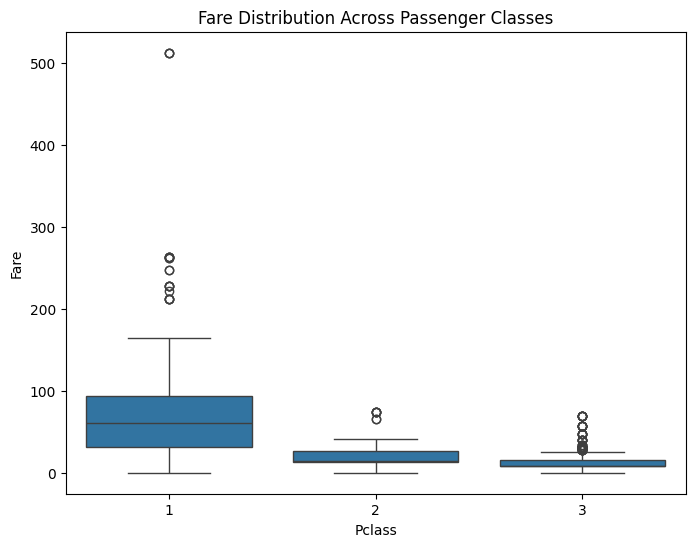

0.063
The Fare range with the most counts is 5-10 with 317 occurrences.


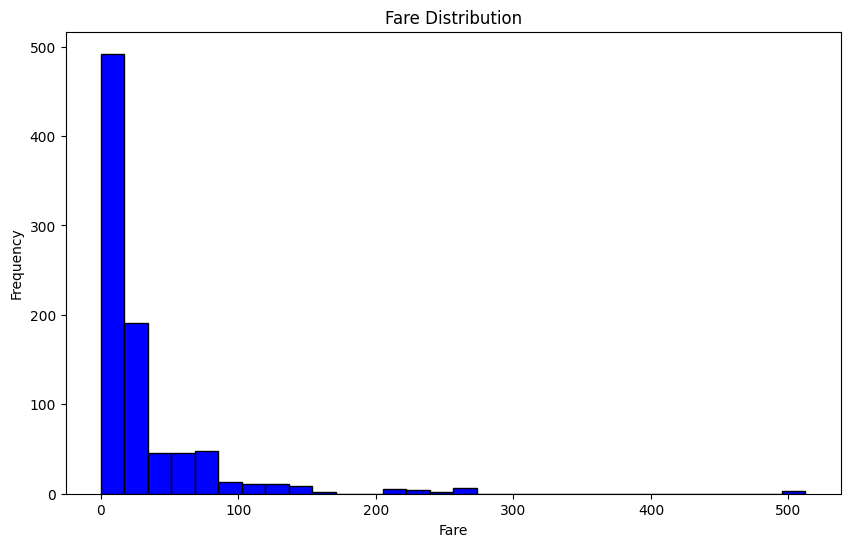

In [10]:
#mount cloud drive so we can access the data on the drive
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv")

rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


# Calculate the mean for all numeric columns
mean_values = df.mean(numeric_only=True)

# Find the column with the highest mean
highest_mean_column = mean_values.idxmax()
highest_mean_value = mean_values.max()

print(f"The variable with the highest mean value is '{highest_mean_column}' with a mean of {highest_mean_value}")


# Count the total number of missing values
total_missing_values = df.isnull().sum().sum()

print(f"Total missing values in the dataset: {total_missing_values}")

# Create the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=df)

# Add a title
plt.title("Fare Distribution Across Passenger Classes")

# Show the plot
plt.show()

# Normalize the 'Fare' column using Min-Max normalization
fare_min = df['Fare'].min()
fare_max = df['Fare'].max()
df['Fare_normalized'] = (df['Fare'] - fare_min) / (fare_max - fare_min)

# Calculate the mean of the normalized 'Fare' values
mean_fare_normalized = df['Fare_normalized'].mean()

# Print the mean value rounded to 3 decimal places
print(round(mean_fare_normalized, 3))



# Define the bins for the Fare ranges
bins = [0, 5, 10, 20, 50, 100, 200, 500, df['Fare'].max()]

# Define labels for the bins
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500+']

# Create a new column for Fare ranges
df['Fare_range'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each Fare range
fare_counts = df['Fare_range'].value_counts()

# Find the Fare range with the most counts
most_frequent_range = fare_counts.idxmax()
most_frequent_count = fare_counts.max()

print(f"The Fare range with the most counts is {most_frequent_range} with {most_frequent_count} occurrences.")


# Create the histogram for the 'Fare' variable
plt.figure(figsize=(10,6))
plt.hist(df['Fare'], bins=30, color='blue', edgecolor='black')

# Add labels and title
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Show the plot
plt.show()
